#### Use Random Forest to prepare a model on fraud data  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_data["income"]="<=30000"
fraud_data.loc[fraud_data["Taxable.Income"]>=30000,"income"]="Good"
fraud_data.loc[fraud_data["Taxable.Income"]<=30000,"income"]="Risky"

In [7]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


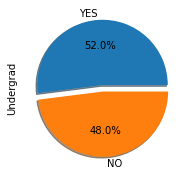

In [12]:
fraud_data['Undergrad'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(3,3))
plt.show()

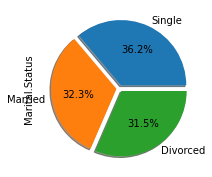

In [11]:
fraud_data['Marital.Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(3,3))
plt.show()

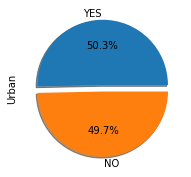

In [16]:
fraud_data['Urban'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(3,3))
plt.show()

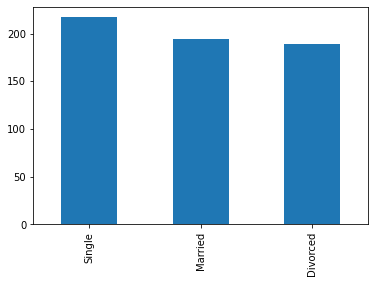

In [14]:
fraud_data['Marital.Status'].value_counts(sort=True).plot.bar()
plt.show()

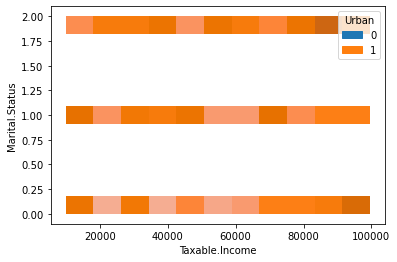

In [28]:
sns.histplot(y=fraud_data['Marital.Status'],x=fraud_data['Taxable.Income'],hue=fraud_data['Urban'])
plt.show()

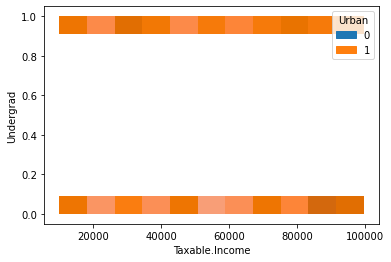

In [29]:
sns.histplot(y=fraud_data['Undergrad'],x=fraud_data['Taxable.Income'],hue=fraud_data['Urban'])
plt.show()

In [17]:
categ = ['Undergrad','Marital.Status','Urban','income']

# Encode Categorical Columns
le = LabelEncoder()
fraud_data[categ] = fraud_data[categ].apply(le.fit_transform)

In [18]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [19]:
x=fraud_data.drop(labels='income',axis=1)
y=fraud_data[['income']]

In [20]:
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [21]:
y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [23]:
x_train.shape,x_test.shape

((480, 6), (120, 6))

In [43]:
rf_model = RandomForestClassifier(n_estimators=400,
                                criterion='gini',
                                max_depth=3,
                                min_samples_split=2,
                                max_features='auto')

In [44]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=400)

In [45]:
y_pred_train=rf_model.predict(x_train)

In [46]:
print(classification_report(y_train,y_pred_train))
print('===================================================')
print(confusion_matrix(y_train,y_pred_train))
print('===================================================')
accuracy_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

[[382   0]
 [  0  98]]


1.0

In [47]:
y_pred_test=rf_model.predict(x_test)

In [48]:
print(classification_report(y_test,y_pred_test))
print('===================================================')
print(confusion_matrix(y_test,y_pred_test))
print('===================================================')
accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[94  0]
 [ 0 26]]


1.0

### With Entropy

In [50]:
rf_model1 = RandomForestClassifier(n_estimators=400,
                                criterion='entropy',
                                max_depth=3,
                                min_samples_split=2,
                                max_features='auto')

In [51]:
rf_model1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=400)

In [52]:
y_pred_train=rf_model1.predict(x_train)

In [53]:
print(classification_report(y_train,y_pred_train))
print('===================================================')
print(confusion_matrix(y_train,y_pred_train))
print('===================================================')
accuracy_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

[[382   0]
 [  0  98]]


1.0

In [54]:
y_pred_test=rf_model1.predict(x_test)

In [55]:
print(classification_report(y_test,y_pred_test))
print('===================================================')
print(confusion_matrix(y_test,y_pred_test))
print('===================================================')
accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[94  0]
 [ 0 26]]


1.0

In [56]:
import warnings
warnings.filterwarnings('ignore')